<h1><span data-sheets-root="1">⚙️ </span>Dataset Preprocessing</h1>
<p data-start="105" data-end="399">The <strong data-start="109" data-end="123">Preprocess</strong> category in the left panel of the block editor provides blocks for preparing your dataset before training a model.<br data-start="238" data-end="241">Proper preprocessing is a crucial step in the machine learning workflow &mdash; it ensures that your model learns efficiently and generalizes well to unseen data.</p>
<p data-start="401" data-end="453">Below are the main preprocessing blocks you can use:</p>
<ul data-start="455" data-end="2103">
<li data-start="455" data-end="714">
<p data-start="457" data-end="714"><strong data-start="457" data-end="469">Splitter</strong> &ndash; Divides the dataset into <strong data-start="497" data-end="509">training</strong> and <strong data-start="514" data-end="525">testing</strong> sets.<br data-start="531" data-end="534">This separation allows the model to learn from one part of the data and then be evaluated on a separate, unseen portion &mdash; providing a reliable estimate of real-world performance.</p>
</li>
<li data-start="716" data-end="977">
<p data-start="718" data-end="977"><strong data-start="718" data-end="728">Scaler</strong> &ndash; <strong data-start="731" data-end="761">Normalizes or standardizes</strong> feature values so that all features contribute equally during training.<br data-start="833" data-end="836">This prevents features with large numeric ranges from dominating those with smaller ranges and helps improve both convergence and accuracy.</p>
</li>
<li data-start="979" data-end="1182">
<p data-start="981" data-end="1182"><strong data-start="981" data-end="990">Noise</strong> &ndash; Adds <strong data-start="998" data-end="1025">controlled random noise</strong> to the dataset.<br data-start="1041" data-end="1044">This can make the model more robust by helping it generalize better and avoid overfitting, especially in small or overly clean datasets.</p>
</li>
<li data-start="1184" data-end="1427">
<p data-start="1186" data-end="1427"><strong data-start="1186" data-end="1197">Shuffle</strong> &ndash; <strong data-start="1200" data-end="1224">Randomizes the order</strong> of samples in the dataset.<br data-start="1251" data-end="1254">Shuffling helps ensure that data fed into training and testing processes are not ordered in a way that introduces bias (for example, all similar samples grouped together).</p>
</li>
<li data-start="1429" data-end="2103">
<p data-start="1431" data-end="1604"><strong data-start="1431" data-end="1442">Encoder</strong> &ndash; Converts <strong data-start="1454" data-end="1493">categorical or non-numeric features</strong> into numerical form that machine learning models can interpret.<br data-start="1557" data-end="1560">This block includes several encoder types:</p>
<ul data-start="1607" data-end="2103">
<li data-start="1607" data-end="1704">
<p data-start="1609" data-end="1704"><strong data-start="1609" data-end="1626">Label Encoder</strong> &ndash; Assigns a unique integer to each category (e.g., red=0, green=1, blue=2).</p>
</li>
<li data-start="1707" data-end="1845">
<p data-start="1709" data-end="1845"><strong data-start="1709" data-end="1728">Ordinal Encoder</strong> &ndash; Similar to label encoding, but preserves a <strong data-start="1774" data-end="1794">meaningful order</strong> among categories (e.g., small &lt; medium &lt; large).</p>
</li>
<li data-start="1848" data-end="1969">
<p data-start="1850" data-end="1969"><strong data-start="1850" data-end="1869">One-Hot Encoder</strong> &ndash; Creates a <strong data-start="1882" data-end="1917">binary column for each category</strong>, representing presence or absence with 1s and 0s.</p>
</li>
<li data-start="1972" data-end="2103">
<p data-start="1974" data-end="2103"><strong data-start="1974" data-end="1995">Date-Time Encoder</strong> &ndash; Extracts useful components such as year, month, day, or hour from date/time fields for temporal analysis.&nbsp;</p>
</li>
</ul>
</li>
</ul>

<h2>Splitter</h2>
<p>The splitter accepts a fraction as an arg which sets the relative portion of the test size with regards to the full dataset size.</p>
<p>For example, test_size=<em>0.2</em> for a dataset of a size 1,000 would divide it into 800 train rows vs 200 test rows.</p>
<p>Once we use the splitter block, the data flow from that point would consider both the train set and the test set.&nbsp;</p>
<p>As and example, let's take the&nbsp;<strong>Plant Disease</strong> dataset (size 999), split it and print the table rows:</p>

In [1]:
from pyy.dataset import Dataset
from pyy.splitter import Splitter
from pyy.table_view import TableView

# VISIBLE_CODE_START
#✏️ Splitter
Dataset(file_name='plant_disease.csv', target=["disease_present"],block_id='jr@;=S~t#/#*{`Wa7q5U')
Splitter(test_size=0.4, random_state=42,block_id='Bn|+CTJu~xH`WI!U?aXw')
TableView(max_rows=5, max_cols=10, title='(auto)', has_header=True, has_border=True, transpose=False,block_id='**Lq;hP*JbkI*a;XF(pQ')
# VISIBLE_CODE_END

Plant_Disease Dataset - Train Data

,temperature,humidity,rainfall,soil_pH,target
0,32.615620,100.000000,8.663142,7.698286,0
1,28.192962,55.407524,10.247443,7.882330,0
...,...,...,...,...,...
597,25.370474,41.794142,21.703560,6.753182,0
598,23.286427,18.973993,0.935632,5.189595,0


Plant_Disease Dataset - Test Data

,temperature,humidity,rainfall,soil_pH,target
0,27.520233,100.000000,13.982903,5.510312,0
1,18.616257,44.414198,3.438850,4.174314,0
...,...,...,...,...,...
398,22.278086,47.654375,30.205117,5.877084,1
399,25.979226,24.296742,7.858329,6.480722,0


<p>As we can see above, two tables were printed, one for the training set and the other for the test set</p>

<h2>Noise</h2>
<p data-start="68" data-end="412">Using the <strong data-start="78" data-end="87">Noise</strong> block, we can <em data-start="102" data-end="120">&ldquo;make it harder&rdquo;</em> for the model during training, helping it become more <strong data-start="175" data-end="198">robust and reliable</strong>. By adding small random variations to the training data, the model learns to focus on the true underlying relationships rather than memorizing specific examples &mdash; improving its ability to generalize to new data.</p>
<blockquote data-start="414" data-end="613">
<p data-start="416" data-end="613"><strong data-start="416" data-end="425">Note:</strong> Noise is always added <strong data-start="448" data-end="477">only to the training set</strong>, not to the test set.<br data-start="500" data-end="503">Therefore, the <strong data-start="520" data-end="529">Noise</strong> block should be placed <strong data-start="553" data-end="575">after the Splitter</strong> block in the preprocessing pipeline.</p>
</blockquote>
<p data-start="615" data-end="664">The <strong data-start="619" data-end="633">Noise type</strong> can be one of the following:</p>
<ul data-start="665" data-end="1129">
<li data-start="665" data-end="828">
<p data-start="667" data-end="828"><strong data-start="667" data-end="678">Uniform</strong> &ndash; Adds random values drawn from a <em data-start="713" data-end="735">uniform distribution</em> within a defined range (<code data-start="760" data-end="765">min</code>, <code data-start="767" data-end="772">max</code>). Each value within that range has equal probability.</p>
</li>
<li data-start="829" data-end="980">
<p data-start="831" data-end="980"><strong data-start="831" data-end="852">Normal (Gaussian)</strong> &ndash; Adds noise drawn from a <em data-start="879" data-end="900">normal distribution</em>, centered around zero, with most values close to the mean and fewer extremes.</p>
</li>
<li data-start="981" data-end="1129">
<p data-start="983" data-end="1129"><strong data-start="983" data-end="994">Laplace</strong> &ndash; Similar to the normal distribution but with <strong data-start="1041" data-end="1076">sharper peaks and heavier tails</strong>, which can introduce stronger local perturbations.</p>
</li>
</ul>
<p data-start="1131" data-end="1246">Each noise type allows you to specify <strong data-start="1169" data-end="1199">minimum and maximum values</strong> to control the magnitude of the disturbance.</p>
<p data-start="1248" data-end="1345" data-is-last-node="" data-is-only-node="">Let&rsquo;s add a <strong data-start="1260" data-end="1269">Noise</strong> block to a small custom data set and explore how it affects the data - we'll add uniform noise in the range 2.</p>

In [2]:
from pyy.custom_data import CustomData
from pyy.plot import Plot
from pyy.noise import Noise

# VISIBLE_CODE_START
#✏️ Add Noise
CustomData(data=[
  { "x": 1, "y": 2.6 }, { "x": 2, "y": 5.4 },
  { "x": 3, "y": 4.1 }, { "x": 4, "y": 8.5 },
  { "x": 5, "y": 8.2 }, { "x": 6, "y": 13.8 },
  { "x": 7, "y": 14.3 }, { "x": 8, "y": 12.5 },
  { "x": 9, "y": 19.7 }, { "x": 10, "y": 23.3 }
]
, target=["y"],block_id='sR30,?K^8HAGJunx/r=@')
Plot(plot_type='line', columns=["x"], title='Original Data', fig_size='6.4 x 4.8', show_color_bar=True, cmap='tab10',block_id='O%%8/eu:~sp0C`Tv_.KD')
Noise(noise_type='uniform', columns=[], min=2.0, max=4.0,block_id='P`Ae8|zEH^n#V!XOO/FS')
Plot(plot_type='line', columns=["x"], title='Data + Noise', fig_size='6.4 x 4.8', show_color_bar=True, cmap='tab10',block_id='hSOw^G.0:KfF],l;USt-')
# VISIBLE_CODE_END

0

<?xml version="1.0" encoding="utf-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
  "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<svg xmlns:xlink="http://www.w3.org/1999/xlink" width="460.8pt" height="345.6pt" viewBox="0 0 460.8 345.6" xmlns="http://www.w3.org/2000/svg" version="1.1">
 <metadata>
  <rdf:RDF xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:cc="http://creativecommons.org/ns#" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
   <cc:Work>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:date>2025-12-06T18:06:53.533000</dc:date>
    <dc:format>image/svg+xml</dc:format>
    <dc:creator>
     <cc:Agent>
      <dc:title>Matplotlib v3.8.4, https://matplotlib.org/</dc:title>
     </cc:Agent>
    </dc:creator>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <defs>
  <style type="text/css">*{stroke-linejoin: round; stroke-linecap: butt}</style>
 </defs>
 <g id="figure_1">
  <g id="patch_1">
   <path d="M 0 345.6 
L 460.8 345

1

<?xml version="1.0" encoding="utf-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
  "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<svg xmlns:xlink="http://www.w3.org/1999/xlink" width="460.8pt" height="345.6pt" viewBox="0 0 460.8 345.6" xmlns="http://www.w3.org/2000/svg" version="1.1">
 <metadata>
  <rdf:RDF xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:cc="http://creativecommons.org/ns#" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
   <cc:Work>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:date>2025-12-06T18:06:53.533000</dc:date>
    <dc:format>image/svg+xml</dc:format>
    <dc:creator>
     <cc:Agent>
      <dc:title>Matplotlib v3.8.4, https://matplotlib.org/</dc:title>
     </cc:Agent>
    </dc:creator>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <defs>
  <style type="text/css">*{stroke-linejoin: round; stroke-linecap: butt}</style>
 </defs>
 <g id="figure_1">
  <g id="patch_1">
   <path d="M 0 345.6 
L 460.8 345

<p>We can observe that the second graph, after adding noise, retains the same overall shape</p>
<p>as the first one but shows greater variation and irregularities.</p>

<h2>Scaler</h2>
<p>Open the app and, in the file explorer, navigate to the <strong data-start="129" data-end="141">datasets</strong> folder. Then select <strong data-start="162" data-end="191">college_student_placement</strong>.<br data-start="192" data-end="195">The table header looks like this:<br>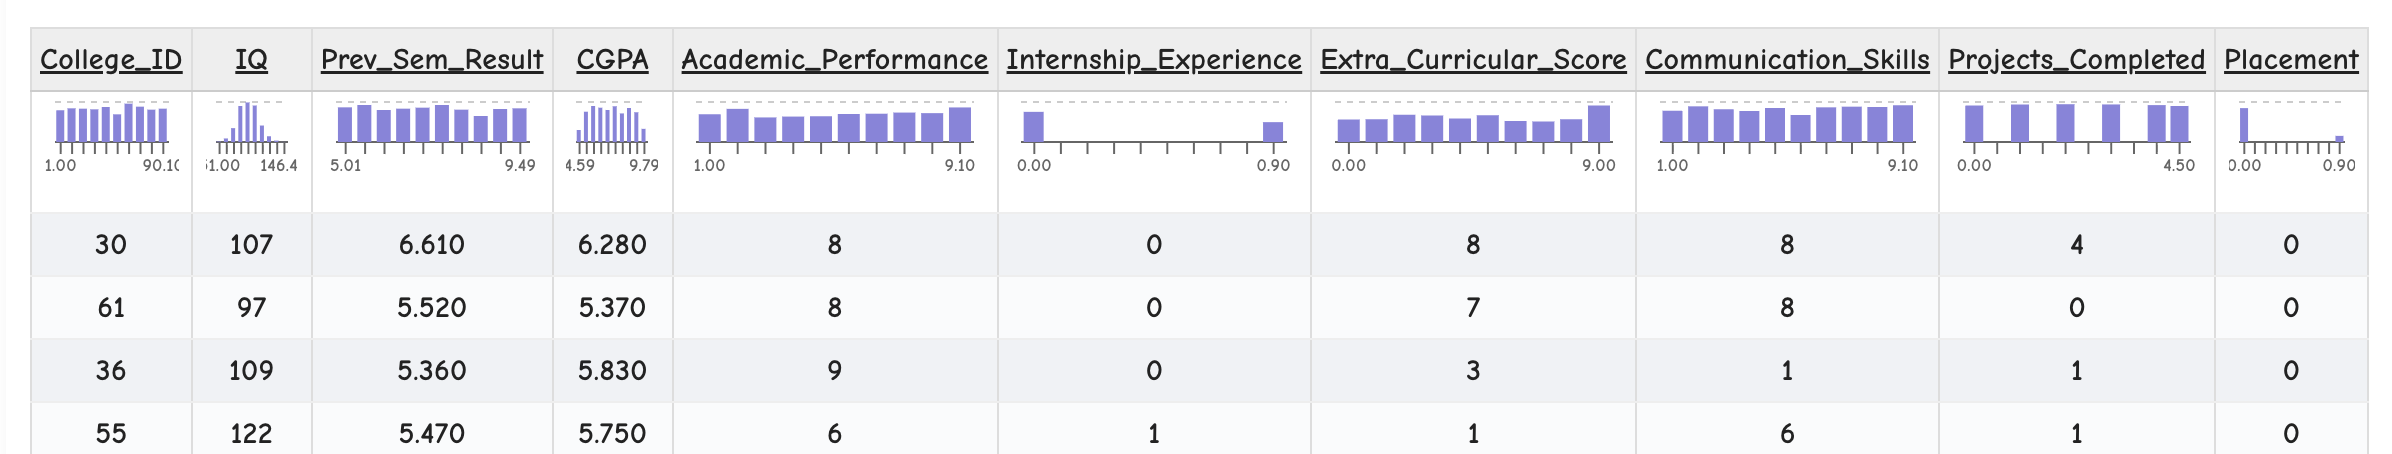</p>
<p data-start="240" data-end="427">As we can see, some features have <strong data-start="274" data-end="303">very large numeric ranges</strong>, while others have <strong data-start="323" data-end="346">much smaller values</strong>. To balance their influence during training, we’ll apply the <strong data-start="408" data-end="418">Scaler</strong> block.</p>
<p data-start="429" data-end="652" data-is-last-node="" data-is-only-node="">Let’s print the first five rows of the dataset — first <strong data-start="484" data-end="503">without scaling</strong>, and then <strong data-start="514" data-end="540">with the MinMax Scaler </strong>with a range (0,1), which adjusts each feature by shifting and rescaling its values to fit within the specified <strong data-start="634" data-end="651">min–max range</strong>.</p>

In [3]:
from pyy.dataset import Dataset
from pyy.table_view import TableView
from pyy.scaler import Scaler

# VISIBLE_CODE_START
#✏️ Min-Max Scaler
Dataset(file_name='college_student_placement.csv', target=[],block_id='^P}FE1|C39COA+[!a[-.')
TableView(max_rows=5, max_cols=10, title='Before Scaling', has_header=True, has_border=True, transpose=False,block_id='+zCgbz8_$xZjZ#dKj%PY')
Scaler(scaler_type='Min-Max', feature_range=(0,1), columns=[],block_id='1Xp*AEolEOyDzN|]L5Xd')
TableView(max_rows=5, max_cols=10, title='After Scaling', has_header=True, has_border=True, transpose=False,block_id='V0;+wY7[Dt|flc0/fv{?')
# VISIBLE_CODE_END

Before Scaling

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,30,107,6.61,6.28,8,0,8,8,4,0
1,61,97,5.52,5.37,8,0,7,8,0,0
...,...,...,...,...,...,...,...,...,...,...
998,9,91,7.22,7.24,6,0,5,1,4,0
999,79,108,6.42,6.15,5,0,8,9,5,0


After Scaling

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,0.292929,0.528302,0.321285,0.292388,0.777778,0,0.8,0.777778,0.8,0
1,0.606061,0.433962,0.102410,0.134948,0.777778,0,0.7,0.777778,0.0,0
...,...,...,...,...,...,...,...,...,...,...
998,0.080808,0.377358,0.443775,0.458478,0.555556,0,0.5,0.000000,0.8,0
999,0.787879,0.537736,0.283133,0.269896,0.444444,0,0.8,0.888889,1.0,0


<p>We clearly see how scaling of the data into 0..1 range using MinMax Scaler transformed it into a more unified feature set in the sense of the contribution of each to the model training.</p>

<h2>Shuffle</h2>
<p>The <strong data-start="4" data-end="15">Shuffle</strong> block randomly reorders the rows of the dataset, ensuring that the samples are presented in a <strong data-start="110" data-end="130">randomized order</strong>. This helps prevent unintended patterns or biases (such as grouped classes or time-based ordering) from influencing the training process.</p>

In [4]:
from pyy.custom_data import CustomData
from pyy.shuffle import Shuffle
from pyy.table_view import TableView

# VISIBLE_CODE_START
#✏️ Shuffle
CustomData(data=[
	{"name": "Alice", "age": 30},
  	{"name": "Bob", "age": 25},
	{"name": "Alice", "age": 30},
  	{"name": "Jack",  "age": 15},

], target=["age"],block_id='l7:-qU`,w3IRaJi?8B[M')
Shuffle(seed=42,block_id='**P0p`.5dcV.oS2mwGHj')
TableView(max_rows=10, max_cols=10, title='Data Shuffled', has_header=True, has_border=True, transpose=False,block_id='.{|bO;eJ;W@|oo$y7nhX')
# VISIBLE_CODE_END

Data Shuffled

,name,target
0,Jack,15
1,Alice,30
2,Bob,25
3,Alice,30


<h2>Encoder</h2>
<p>The <strong>Encoder</strong> block transforms non-numeric (categorical) features into numerical form that machine learning models can interpret.<br data-start="1557" data-end="1560"><strong data-start="1609" data-end="1626"></strong></p>
<ul data-start="455" data-end="2103">
<li data-start="1429" data-end="2103">
<ul data-start="1607" data-end="2103">
<li data-start="1607" data-end="1704">
<p data-start="1609" data-end="1704"><strong data-start="1609" data-end="1626">Label Encoder</strong> &ndash; Assigns a unique integer to each category (e.g., red=0, green=1, blue=2) - used on the target column to make the classes numeric</p>
</li>
<li data-start="1707" data-end="1845">
<p data-start="1709" data-end="1845"><strong data-start="1709" data-end="1728">Ordinal Encoder</strong> &ndash; Similar to label encoding, but preserves a <strong data-start="1774" data-end="1794">meaningful order</strong> among categories (e.g., small &lt; medium &lt; large).</p>
</li>
<li data-start="1848" data-end="1969">
<p data-start="1850" data-end="1969"><strong data-start="1850" data-end="1869">One-Hot Encoder</strong> &ndash; Creates a <strong data-start="1882" data-end="1917">binary column for each category</strong>, representing presence or absence with 1s and 0s, e.g. 001,&nbsp;</p>
</li>
<li data-start="1972" data-end="2103">
<p data-start="1974" data-end="2103"><strong data-start="1974" data-end="1995">Date-Time Encoder</strong> &ndash; Extracts useful components such as year, month, day, or hour from date/time fields for temporal analysis.</p>
</li>
</ul>
</li>
</ul>
<p>&nbsp;For example, given a dataset with categorical target we can tranfrom it into a numerical target using <strong>LabelEncoder</strong>:</p>

In [5]:
from pyy.custom_data import CustomData
from pyy.encoder import Encoder
from pyy.table_view import TableView

# VISIBLE_CODE_START
#✏️ LabelEncoder - Encode the target
CustomData(data=[
  { "name": "Alice", "birth_date": "1995-06-12", "likes": "climbing" },
  { "name": "Bob",   "birth_date": "2000-03-27", "likes": "swimming" },
  { "name": "Alice", "birth_date": "1995-06-12", "likes": "rafting" },
  { "name": "Jack",  "birth_date": "2010-09-04", "likes": "jogging" }
]
, target=["likes"],block_id='yedK#}2jojL6rQnFzg39')
Encoder(name='LabelEncoder',block_id='+b*,p-SLoD)ZlDyU,1Wc')
TableView(max_rows=10, max_cols=10, title='Data with target encoded (LabelEncoder)', has_header=True, has_border=True, transpose=False,block_id='`r,ZgqV!y4[JO%8?:%R0')
# VISIBLE_CODE_END

Data with target encoded (LabelEncoder)

,name,birth_date,target
0,Alice,1995-06-12,0
1,Bob,2000-03-27,3
2,Alice,1995-06-12,2
3,Jack,2010-09-04,1


<p data-start="0" data-end="115">We can also encode the <strong data-start="23" data-end="31">name</strong> and <strong data-start="36" data-end="50">birth_date</strong> columns to convert all dataset values into <strong data-start="94" data-end="112">numerical form</strong>.</p>
<ul data-start="117" data-end="462" data-is-last-node="" data-is-only-node="">
<li data-start="117" data-end="226">
<p data-start="119" data-end="226">Apply the <strong data-start="129" data-end="148">Ordinal Encoder</strong> to the <strong data-start="156" data-end="164">name</strong> column &mdash; it assigns a unique integer to each distinct name.</p>
</li>
<li data-start="227" data-end="462" data-is-last-node="">
<p data-start="229" data-end="462" data-is-last-node="">Apply the <strong data-start="239" data-end="263">Date-Time Featurizer</strong> to the <strong data-start="271" data-end="285">birth_date</strong> column &mdash; it extracts components such as <strong data-start="326" data-end="334">year</strong>, <strong data-start="336" data-end="345">month</strong>, and <strong data-start="351" data-end="358">day</strong>, converting date information into numerical features that the model can understand and use effectively.</p>
</li>
</ul>

In [6]:
from pyy.custom_data import CustomData
from pyy.encoder import Encoder
from pyy.table_view import TableView

# VISIBLE_CODE_START
#✏️ LabelEncoder, OrdinalEncoder & DateTimeFeaturizer
CustomData(data=[
  { "name": "Alice", "birth_date": "1995-06-12", "likes": "climbing" },
  { "name": "Bob",   "birth_date": "2000-03-27", "likes": "swimming" },
  { "name": "Alice", "birth_date": "1995-06-12", "likes": "rafting" },
  { "name": "Jack",  "birth_date": "2010-09-04", "likes": "jogging" }
]
, target=["likes"],block_id='yedK#}2jojL6rQnFzg39')
Encoder(name='LabelEncoder',block_id='+b*,p-SLoD)ZlDyU,1Wc')
Encoder(name='OrdinalEncoder', columns=["name"],block_id='hcP/_J(a%gKd{XM!#vT|')
Encoder(name='DateTimeFeaturizer', columns=["birth_date"],block_id='OxUfjMGEs-(k+xG@bt%o')
TableView(max_rows=10, max_cols=10, title='Data with name, birth_date and target encoded', has_header=True, has_border=True, transpose=False,block_id='5lK~[PoMHCmXoWr/Pq56')
# VISIBLE_CODE_END

Data with name, birth_date and target encoded

,name,birth_date,target
0,0.0,802915200,0
1,1.0,954115200,3
2,0.0,802915200,2
3,2.0,1283558400,1


<h2>Wrap-Up Example: Stock Market</h2>
<p>As a summary example, let’s explore the <strong data-start="77" data-end="98">Stock Market 2025</strong> dataset:</p>
<p>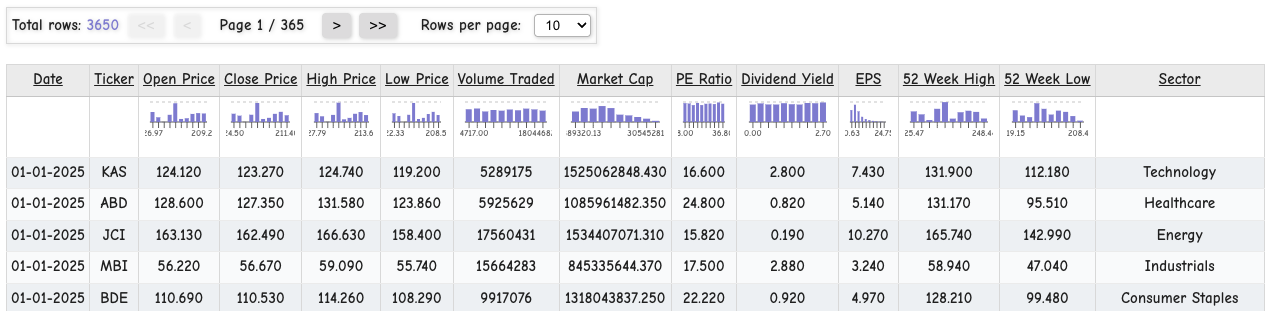</p>
<p></p>

In [7]:
from pyy.dataset import Dataset
from pyy.encoder import Encoder
from pyy.scaler import Scaler
from pyy.splitter import Splitter
from pyy.table_view import TableView

# VISIBLE_CODE_START
#✏️ Prprocess the Stock Market Dataset
Dataset(file_name='stock_market_2025.csv', target=["Sector"],block_id='/lO4TUatTG5MGk6S16bu')
Encoder(name='LabelEncoder',block_id='qJAmBdcpdCs#*CdtGae5')
Encoder(name='OrdinalEncoder', columns=["Ticker"],block_id='k,x.B9wjHmmAVJ-Sj~@D')
Encoder(name='DateTimeFeaturizer', columns=["Date"],block_id='rPjrU|uGuq`uyKCKhC1W')
Scaler(scaler_type='Min-Max', feature_range=(0,1), columns=[],block_id='hF`,yv|T{:id69ai$GR*')
Splitter(test_size=0.2, random_state=42,block_id='Kd6JKU7J~q@ead5h!_1Z')
TableView(max_rows=10, max_cols=10, title='(auto)', has_header=True, has_border=True, transpose=False,block_id='-uGj^lS^@PH5[DU2bruH')
# VISIBLE_CODE_END

Stock_Market_2025 Dataset - Train Data

,Date,Ticker,Open Price,Close Price,High Price,...,Dividend Yield,EPS,52 Week High,52 Week Low,target
0,0.0,6.0,0.65261,0.636491,0.641031,...,0.98,0.252612,0.605514,0.497385,2
1,0.998545,4.0,0.356575,0.361872,0.360955,...,0.46,0.11194,0.307459,0.302149,6
2,0.0,5.0,0.818923,0.822651,0.813251,...,0.21,0.199627,0.81973,0.809707,0
3,0.0,3.0,0.036245,0.059084,0.049303,...,0.6,0.082463,0.067894,0.052291,9
4,0.0,1.0,0.467434,0.455579,0.468811,...,0.936667,0.220149,0.411641,0.446853,1
...,...,...,...,...,...,...,...,...,...,...,...
2915,0.0,7.0,0.461162,0.462946,0.457817,...,0.78,0.138433,0.418221,0.316125,8
2916,0.999465,1.0,0.499531,0.489141,0.508572,...,0.423333,0.195896,0.472269,0.430405,1
2917,0.0,7.0,0.466644,0.472962,0.463871,...,0.416667,0.177985,0.402438,0.369842,8
2918,0.0,3.0,0.060985,0.051765,0.056373,...,0.633333,0.012313,0.063655,0.064794,9


Stock_Market_2025 Dataset - Test Data

,Date,Ticker,Open Price,Close Price,High Price,...,Dividend Yield,EPS,52 Week High,52 Week Low,target
0,0.999945,9.0,0.098267,0.093658,0.09662,...,0.87,0.096269,0.104747,0.061466,5
1,0.0,1.0,0.421411,0.439977,0.432584,...,0.476667,0.099254,0.374263,0.454269,1
2,0.0,5.0,0.813984,0.80286,0.803274,...,0.29,0.166418,0.784855,0.754373,0
3,0.0,1.0,0.492272,0.514566,0.502228,...,0.283333,0.376119,0.512271,0.352348,1
4,0.999733,6.0,0.695966,0.692108,0.69227,...,0.25,0.26306,0.698474,0.500761,2
...,...,...,...,...,...,...,...,...,...,...,...
725,0.998082,5.0,0.785739,0.778206,0.770389,...,0.73,0.263433,0.65593,0.581337,0
726,0.998003,9.0,0.142956,0.13743,0.138076,...,0.363333,0.044403,0.132679,0.09807,5
727,0.0,6.0,0.719421,0.721866,0.72099,...,0.876667,0.141791,0.685679,0.704887,2
728,0.999237,2.0,0.905684,0.896952,0.907788,...,0.016667,0.334701,0.816017,0.720527,3


<article class="text-token-text-primary w-full focus:outline-none [--shadow-height:45px] has-data-writing-block:pointer-events-none has-data-writing-block:-mt-(--shadow-height) has-data-writing-block:pt-(--shadow-height) [&amp;:has([data-writing-block])&gt;*]:pointer-events-auto [content-visibility:auto] supports-[content-visibility:auto]:[contain-intrinsic-size:auto_100lvh] scroll-mt-[calc(var(--header-height)+min(200px,max(70px,20svh)))]" dir="auto" data-turn-id="request-68f4ef08-1394-832a-83ff-96f38f819d19-7" data-testid="conversation-turn-30" data-scroll-anchor="true" data-turn="assistant" tabindex="-1">
<div class="text-base my-auto mx-auto pb-10 [--thread-content-margin:--spacing(4)] thread-sm:[--thread-content-margin:--spacing(6)] thread-lg:[--thread-content-margin:--spacing(16)] px-(--thread-content-margin)">
<div class="[--thread-content-max-width:40rem] thread-lg:[--thread-content-max-width:48rem] mx-auto max-w-(--thread-content-max-width) flex-1 group/turn-messages focus-visible:outline-hidden relative flex w-full min-w-0 flex-col agent-turn" tabindex="-1">
<div class="flex max-w-full flex-col grow">
<div data-message-author-role="assistant" data-message-id="1435ac75-0334-4f9b-b205-13b0b0417236" dir="auto" class="min-h-8 text-message relative flex w-full flex-col items-end gap-2 text-start break-words whitespace-normal [.text-message+&amp;]:mt-1" data-message-model-slug="gpt-5">
<div class="flex w-full flex-col gap-1 empty:hidden first:pt-[1px]">
<div class="markdown prose dark:prose-invert w-full break-words dark markdown-new-styling">
<p data-start="0" data-end="98">As we can see, all columns are now <strong data-start="35" data-end="48">numerical</strong>, including the <strong>Sector</strong> - which now is set as the target, so now the dataset is ready for modeling.</p>
<p data-start="100" data-end="172">Next, we can perform a simple <strong data-start="130" data-end="148">classification</strong> task:</p>
<ol data-start="174" data-end="648" data-is-last-node="" data-is-only-node="">
<li data-start="174" data-end="259">
<p data-start="177" data-end="259"><strong data-start="177" data-end="203">Add a Classifier block</strong> &ndash; choose <strong data-start="213" data-end="233">MaxEntropy</strong> as the classifier type to classifiy and predict the sector.</p>
</li>
<li data-start="260" data-end="452">
<p data-start="263" data-end="349"><strong data-start="263" data-end="282">Train the model</strong> and then <strong data-start="292" data-end="311">print its score</strong> by calling the classifier&rsquo;s method:</p>
<div class="contain-inline-size rounded-2xl relative bg-token-sidebar-surface-primary">
<div class="sticky top-9">
<div class="absolute end-0 bottom-0 flex h-9 items-center pe-2">
<div class="bg-token-bg-elevated-secondary text-token-text-secondary flex items-center gap-4 rounded-sm px-2 font-sans text-xs"></div>
</div>
</div>
<div class="overflow-y-auto p-4" dir="ltr"><code class="whitespace-pre! language-python"><span>my_model.get_score()
</span></code></div>
</div>
<p data-start="399" data-end="452">This will display how well the model fits the data.</p>
</li>
<li data-start="453" data-end="648" data-is-last-node="">
<p data-start="456" data-end="648" data-is-last-node=""><strong data-start="456" data-end="481">Visualize the results</strong> &ndash; create a <strong data-start="493" data-end="509">scatter plot</strong> comparing two key features, <strong data-start="538" data-end="552" data-is-only-node="">Market Cap</strong> and <strong data-start="557" data-end="571">Open Price</strong>, to see how they relate to each other and to the target, and how the model might interpret their correlation.</p>
</li>
</ol>
</div>
</div>
</div>
</div>
</div>
</div>
</article>

In [8]:
from pyy.classifier import Classifier
from pyy.plot import ScatterPlot

# VISIBLE_CODE_START
my_classifier=Classifier(name='MaxEntropy',block_id=']o_S4vt1w(^xssTCots[')
print(my_classifier.get_score())
ScatterPlot(columns=["Market Cap","Open Price"], fig_size='6.4 x 4.8', title='(auto)', show_color_bar=True, cmap='tab10',block_id='NL%wP~x+p`6q!K-`W]H|')
# VISIBLE_CODE_END

1.0

0

<?xml version="1.0" encoding="utf-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
  "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<svg xmlns:xlink="http://www.w3.org/1999/xlink" width="460.8pt" height="345.6pt" viewBox="0 0 460.8 345.6" xmlns="http://www.w3.org/2000/svg" version="1.1">
 <metadata>
  <rdf:RDF xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:cc="http://creativecommons.org/ns#" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
   <cc:Work>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:date>2025-12-06T18:06:54.940000</dc:date>
    <dc:format>image/svg+xml</dc:format>
    <dc:creator>
     <cc:Agent>
      <dc:title>Matplotlib v3.8.4, https://matplotlib.org/</dc:title>
     </cc:Agent>
    </dc:creator>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <defs>
  <style type="text/css">*{stroke-linejoin: round; stroke-linecap: butt}</style>
 </defs>
 <g id="figure_1">
  <g id="patch_1">
   <path d="M 0 345.6 
L 460.8 345

<h3 data-start="126" data-end="157">Preprocessing Order Summary</h3>
<div class="_tableContainer_1rjym_1">
<div class="group _tableWrapper_1rjym_13 flex w-fit flex-col-reverse" tabindex="-1">
<table data-start="159" data-end="931" class="w-fit min-w-(--thread-content-width)">
<thead data-start="159" data-end="204">
<tr data-start="159" data-end="204">
<th data-start="159" data-end="177" data-col-size="md">Preprocess Step</th>
<th data-start="177" data-end="193" data-col-size="sm">When to Apply</th>
<th data-start="193" data-end="204" data-col-size="lg">Purpose</th>
</tr>
</thead>
<tbody data-start="253" data-end="931">
<tr data-start="253" data-end="390">
<td data-start="253" data-end="267" data-col-size="md"><strong data-start="255" data-end="266">Shuffle</strong></td>
<td data-col-size="sm" data-start="267" data-end="289"><strong data-start="269" data-end="288">Before Splitter</strong></td>
<td data-col-size="lg" data-start="289" data-end="390">Randomizes sample order to ensure training and test sets are representative of the whole dataset.</td>
</tr>
<tr data-start="391" data-end="553">
<td data-start="391" data-end="442" data-col-size="md"><strong data-start="393" data-end="404">Encoder</strong> (Label, Ordinal, One-Hot, Date-Time)</td>
<td data-col-size="sm" data-start="442" data-end="464"><strong data-start="444" data-end="463">Before Splitter</strong></td>
<td data-col-size="lg" data-start="464" data-end="553">Converts categorical or date/time fields into numerical form for model compatibility.</td>
</tr>
<tr data-start="554" data-end="720">
<td data-start="554" data-end="567" data-col-size="md"><strong data-start="556" data-end="566">Scaler</strong></td>
<td data-col-size="sm" data-start="567" data-end="613"><strong data-start="569" data-end="588">Before Splitter</strong> <em data-start="589" data-end="593">or</em> <strong data-start="594" data-end="612">After Splitter</strong></td>
<td data-col-size="lg" data-start="613" data-end="720">Normalizes feature ranges; if scaling parameters are learned from training data, apply after splitting.</td>
</tr>
<tr data-start="721" data-end="842">
<td data-start="721" data-end="733" data-col-size="md"><strong data-start="723" data-end="732">Noise</strong></td>
<td data-col-size="sm" data-start="733" data-end="777"><strong data-start="735" data-end="776">After Splitter (on training set only)</strong></td>
<td data-col-size="lg" data-start="777" data-end="842">Adds random variation to training data to improve robustness.</td>
</tr>
<tr data-start="843" data-end="931">
<td data-start="843" data-end="858" data-col-size="md"><strong data-start="845" data-end="857">Splitter</strong></td>
<td data-col-size="sm" data-start="858" data-end="862">&mdash;</td>
<td data-col-size="lg" data-start="862" data-end="931">Divides data into training and testing sets for model evaluation.</td>
</tr>
</tbody>
</table>
</div>
</div>
<p></p>